In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

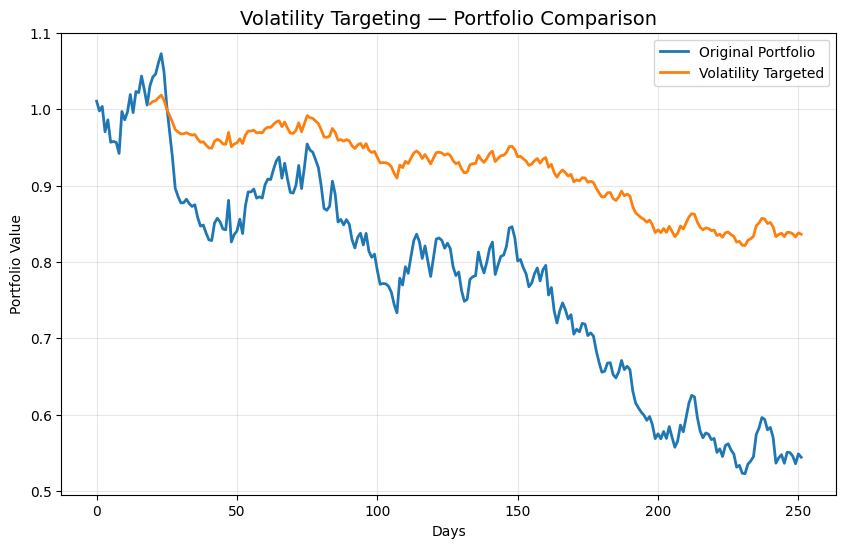

Final Value (Original): 0.5441
Final Value (Volatility Targeted): 0.8362


In [4]:
np.random.seed(12)

returns = pd.Series(np.random.normal(0.001, 0.02, 252))


rolling_vol = returns.rolling(window=20).std()

target_vol = 0.10/np.sqrt(252)

scale_factor = target_vol/rolling_vol

scale_factor.fillna(1) #NEW CONCEPT - Fills NaN values with (1)

scaled_returns = returns * scale_factor

cum_original = (1 + returns).cumprod()
cum_targeted = (1 + scaled_returns).cumprod()

plt.figure(figsize=(10,6))
plt.plot(cum_original, label="Original Portfolio", linewidth=2)
plt.plot(cum_targeted, label="Volatility Targeted", linewidth=2)
plt.title("Volatility Targeting — Portfolio Comparison", fontsize=14)
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Final Value (Original): {cum_original.iloc[-1]:.4f}")
print(f"Final Value (Volatility Targeted): {cum_targeted.iloc[-1]:.4f}")

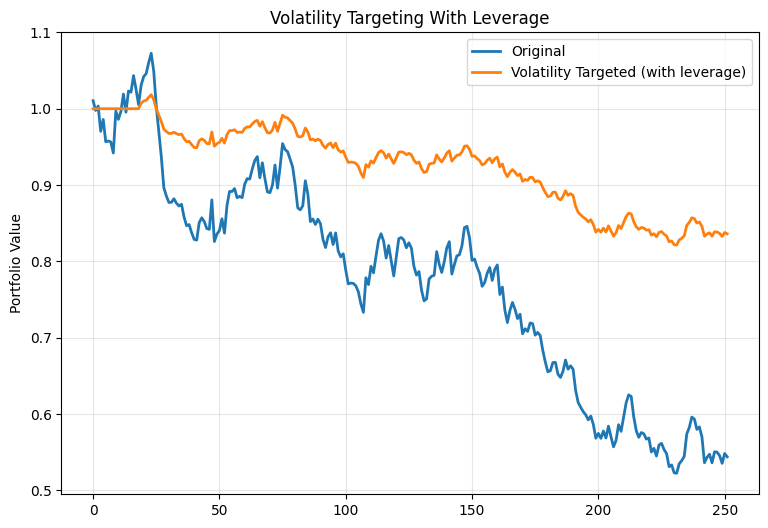

Final Value (Original): 0.5441
Final Value (Volatility Targeted with Leverage): 0.8362


In [14]:
exposure = target_vol / rolling_vol

exposure = np.clip(exposure, 0, 3) # NEW - changes all the outliers outside the range to the min(if below) or the max(if above)

scaled_ret = returns * exposure

original_value = (1 + returns).cumprod()
targeted_value = (1 + scaled_ret.fillna(0)).cumprod()

plt.figure(figsize=(9,6))
plt.plot(original_value, label="Original", linewidth=2)
plt.plot(targeted_value, label="Volatility Targeted (with leverage)", linewidth=2)
plt.title("Volatility Targeting With Leverage")
plt.ylabel("Portfolio Value")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


print(f"Final Value (Original): {original_value.iloc[-1]:.4f}")
print(f"Final Value (Volatility Targeted with Leverage): {targeted_value.iloc[-1]:.4f}")